In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from experiment_train import *
from experiment_datasets import *
from helpers import *
import scipy.stats as st
import matplotlib
from tqdm import tqdm
import pickle
import scipy
from scipy.optimize import curve_fit
from derivative_decay import *

Using TensorFlow backend.


Initialized TensorFlow


In [2]:
# dimensions to try
Ns = [int(t) for t in np.linspace(50, 1000, 15)]

# how much repetitions for each experiment are needed?
repetitions = 10

print('Sizes', Ns)
print('Repetitions', repetitions)
print('Total runs', len(Ns) * repetitions)

Sizes [50, 117, 185, 253, 321, 389, 457, 525, 592, 660, 728, 796, 864, 932, 1000]
Repetitions 10
Total runs 150


In [3]:
# list of things to compute for each experiment
to_run = [mean_d2Ldy2, mean_dLdy]
# parameters for each experiment
parameters = {'reg_coeff': 0, 'reg_type': None, 'do_print': 'plot', 'epochs': 15}

  0%|          | 0/15 [00:00<?, ?it/s]

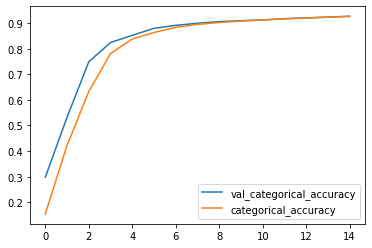

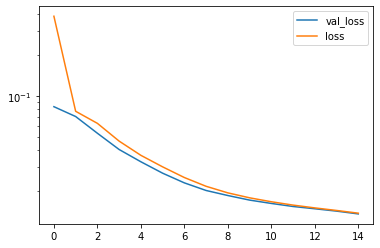

In [ ]:
results = []
for N in tqdm(Ns):
    # results for one N, many repetitions
    buffer = []
    for rep in range(repetitions):
        exp = experiment_for_N(N, parameters)
        buffer.append(get_metrics(exp, to_run))
        tf.reset_default_graph()
        K.clear_session()
    results.append(buffer)

In [ ]:
# key being processed
slopes = {'D': -1, 'H_all': -2, 'H_diag': -2}
for key in slopes.keys():
    # get desired slope (-1/-2)
    slope = slopes[key]

    # fitting the curve
    fcn = partial(line_1_bias, coeff = slope)
    xs = np.log(Ns)
    ys = np.log(get_arr(key, results))
    ys_mean = np.mean(ys, axis = 1)
    ys_std = np.std(ys, axis = 1)
    C = curve_fit(fcn, xs, ys_mean)[0][0]

    plt.figure()
    plt.fill_between(xs, ys_mean - ys_std, ys_mean + ys_std, alpha = 0.3, color = 'green')
    plt.scatter(xs, ys_mean, color = 'green')
    plt.plot(xs, fcn(xs, C), color = 'red')
    plt.title('Derivative decay for %s, slope=%.2f' % (key, slope))
    plt.xlabel('log(n)')
    plt.ylabel('log(%s)' % key)
    plt.show()

All derivatives decay as they should!